## Плугатирьов Дмитро ІП-15

# Комп'ютерний практикум №1

## Залежності

In [152]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Налаштування виводу на екран

In [153]:
def build_histogram(data, bins, title, color='blue'):
    _, ax = plt.subplots(figsize=(8, 6))

    ax.set_title(title)
    ax.set_xlabel('Значення')
    ax.set_ylabel('Частота')

    ax.grid(True)
    ax.hist(data, bins=bins, color=color)
    return ax

def format_statistics_info(data, title):
    mean, std = data
    return f'{title}: \nСереднє: {mean:.3f}, Std: {std:.3f}'

def format_chi_square_info(chi2, chi2_k, title):
    return f'{title}: \nChi^2: {chi2:.3f}, Chi^2 k: {chi2_k}'

## Обчислення значень

In [154]:
# Скільки стовпчиків поміститься на гістограмі
def sturges_bins_amount(items_amt):
    return math.ceil(math.log2(items_amt) + 1)

# Створення пари бінів (межі відрізків на гістограмі)
def split_bins(bins):
    return [(bins[idx - 1], bins[idx]) for idx in range(1, bins.size)]

def calculate_mean_std(items):
    mean = np.mean(items)
    std = np.std(items, ddof=1)
    return (mean, std)

# Chi2 з таблиці (заздалегідь визначена) (функція відсоткової точки - ppf)
def calculate_chi2_k(alpha, bins_amt, params_amt):
    return stats.chi2.ppf(1 - alpha, bins_amt - params_amt - 1)

# Chi2 розраховується за формулою
def calculate_chi2(items_amt, values, bins, compute_step, *args):
    bins_pairs = split_bins(bins)
    probabilities_expected = np.array(
        [compute_step(left, right, *args) for left, right in bins_pairs]
    )
    
    values_expected = items_amt * probabilities_expected
    chi2 = np.sum(np.square(values - values_expected) / values_expected)
    return chi2

def is_matching_chi2_law(chi2, chi2_k):
    return chi2 <= chi2_k

# Експоненційний закон розподілу

## Налаштування графіку гістограми

In [155]:
numbers_to_generate = 10000
exponential_bins = sturges_bins_amount(numbers_to_generate)
print('Відсіки для гістограми Експоненціальна:', exponential_bins)

Відсіки для гістограми Експоненціальна: 15


## Формулювання закону розподілу

In [156]:
lambda_value = 4
xi = np.random.uniform(size=numbers_to_generate)
exponential_law = -1 / lambda_value * np.log(xi)
exponential_law

array([0.01621837, 0.10029877, 0.80938324, ..., 0.28842959, 0.24805342,
       0.69039281])

## Побудова графіку для перевірки закону

<Axes: title={'center': 'Закон - Експоненціальний'}, xlabel='Значення', ylabel='Частота'>

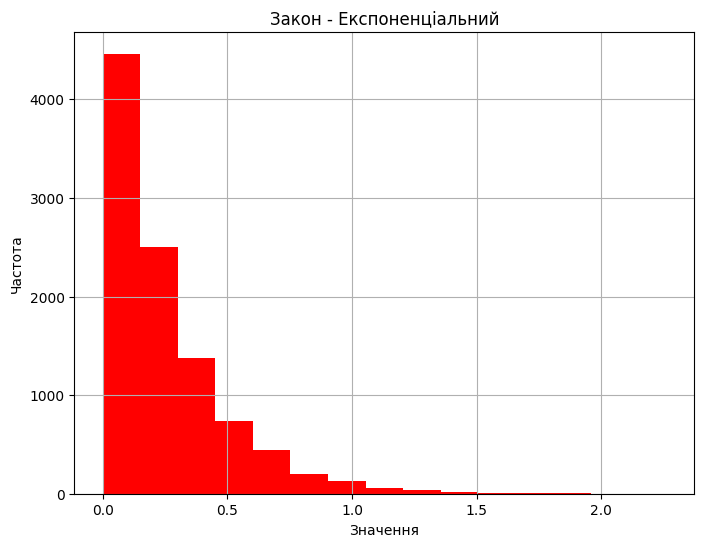

In [157]:
counts, bins = np.histogram(exponential_law, bins=exponential_bins)
build_histogram(exponential_law, exponential_bins, title='Закон - Експоненціальний', color='red')

## Статистика за законом

In [158]:
exponential_stats = calculate_mean_std(exponential_law)
exponential_mean, exponential_std = exponential_stats
fmt = format_statistics_info(exponential_stats, 'Експоненціальний')
print(fmt)

Експоненціальний: 
Середнє: 0.250, Std: 0.246


## Перевірка за критерієм згоди xi^2

In [159]:
def calculate_exponential_step(left, right, lambda_value):
    return np.exp(-lambda_value * left) - np.exp(-lambda_value * right)

lambda_expected = 1 / exponential_mean
exponential_chi2 = calculate_chi2(numbers_to_generate, counts, bins, 
                                calculate_exponential_step, lambda_expected)
exponential_chi2_k = calculate_chi2_k(0.05, exponential_bins, 1)
fmt = format_chi_square_info(exponential_chi2, exponential_chi2_k, 'Експоненціальний')
print(fmt)

Експоненціальний: 
Chi^2: 11.486, Chi^2 k: 22.362032494826934


In [160]:
if is_matching_chi2_law(exponential_chi2, exponential_chi2_k):
    print("Експоненціальний закон працює!")
else:
    print("Експоненціальний закон не працює!")

Експоненціальний закон працює!


# Нормальний закон розподілу

## Налаштування графіку гістограми

In [161]:
numbers_to_generate = 10000
normal_init_bins = sturges_bins_amount(numbers_to_generate)
print('Відсіки для гістограми нормального розподілу:', exponential_bins)

Відсіки для гістограми нормального розподілу: 15


## Формулювання закону розподілу

In [162]:
sigma_value = 4
a_value = -5

normal_law = np.zeros(numbers_to_generate)
for idx in range(numbers_to_generate):
    mu_value = np.random.uniform(size=12).sum() - 6
    normal_law[idx] = sigma_value * mu_value + a_value
normal_law

array([ -4.9297405 , -11.88015949,  -5.69515272, ...,  -6.39305029,
        -2.67458217,  -0.3684195 ])

## Побудова графіку для перевірки закону

<Axes: title={'center': 'Закон - Нормальний розподіл'}, xlabel='Значення', ylabel='Частота'>

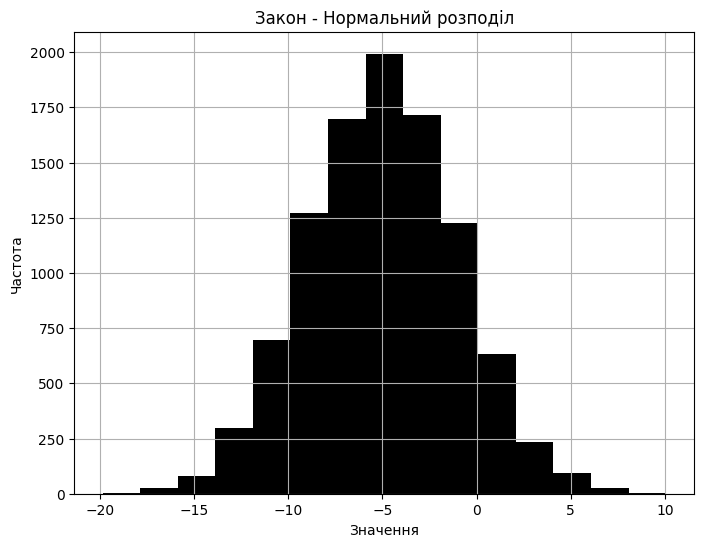

In [163]:
normal_counts, normal_bins = np.histogram(normal_law, bins=normal_init_bins)
build_histogram(normal_law, normal_bins, title='Закон - Нормальний розподіл', color='black')

## Статистика за законом

In [164]:
normal_stats = calculate_mean_std(normal_law)
normal_mean, normal_std = normal_stats
fmt = format_statistics_info(normal_stats, 'Нормальний розподіл')
print(fmt)

Нормальний розподіл: 
Середнє: -4.994, Std: 3.978


## Перевірка за критерієм згоди xi^2

In [165]:
# Кумулятивна функція розподілу - cdf
def calculate_normal_step(left, right, sigma_value, a_value):
    left_cdf, right_cdf = stats.norm.cdf([left, right], loc=sigma_value, scale=a_value)
    return right_cdf - left_cdf

sigma_expected = normal_mean
normal_expected = normal_std
normal_chi2 = calculate_chi2(numbers_to_generate, normal_counts, normal_bins, 
                            calculate_normal_step, sigma_expected, normal_expected)
normal_chi2_k = calculate_chi2_k(0.05, normal_init_bins, 2)
fmt = format_chi_square_info(normal_chi2, normal_chi2_k, 'Нормальний розподіл')
print(fmt)

Нормальний розподіл: 
Chi^2: 14.754, Chi^2 k: 21.02606981748307


In [166]:
if is_matching_chi2_law(normal_chi2, normal_chi2_k):
    print("Закон нормального розподілу працює!")
else:
    print("Закон нормального розподілу не працює!")

Закон нормального розподілу працює!


# Рівномірний закон розподілу

## Конфігурація графіку гістограми

In [167]:
numbers_to_generate = 10000
uniform_init_bins = sturges_bins_amount(numbers_to_generate)
print('Відсіки для Закону рівномірного розподілу:', uniform_init_bins)

Відсіки для Закону рівномірного розподілу: 15


## Формуляція закону розподілу

In [168]:
a_value = 5**13
c_value = 2**31
zi_value = np.random.uniform()

uniform_law = np.zeros(numbers_to_generate)
for idx in range(numbers_to_generate):
    zi_value = (a_value * zi_value) % c_value
    uniform_law[idx] = zi_value / c_value
uniform_law


array([0.07858199, 0.1854437 , 0.32018286, ..., 0.82644033, 0.7305522 ,
       0.24644232])

## Побудова графіку для перевірки закону

<Axes: title={'center': 'Закон - Рівномірний розподіл'}, xlabel='Значення', ylabel='Частота'>

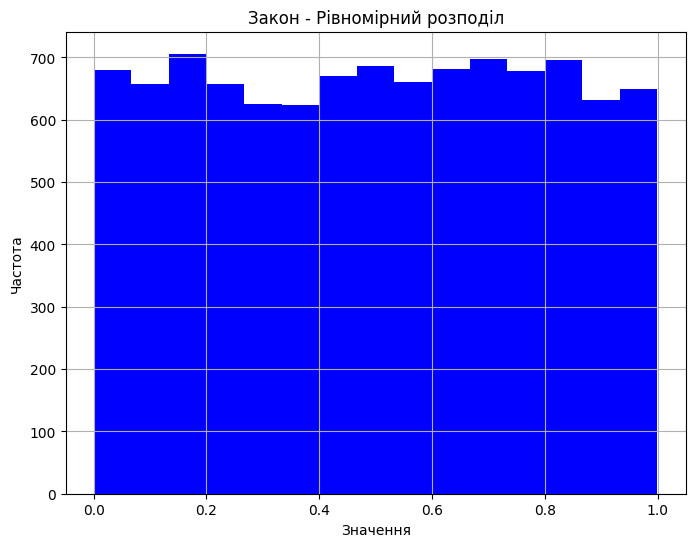

In [169]:
uniform_counts, uniform_bins = np.histogram(uniform_law, bins=uniform_init_bins)
build_histogram(uniform_law, uniform_bins, title='Закон - Рівномірний розподіл', color='blue')

## Статистика за законом

In [170]:
uniform_stats = calculate_mean_std(uniform_law)
uniform_mean, uniform_std = uniform_stats
fmt = format_statistics_info(uniform_stats, 'Рівномірний розподіл')
print(fmt)

Рівномірний розподіл: 
Середнє: 0.500, Std: 0.289


## Перевірка за критерієм згоди xi^2

In [171]:
def calculate_uniform_step(left, right, a_value, c_value):
    return (right - left) / (c_value - a_value)

a_expected = uniform_mean - 3 ** 0.5 * uniform_std
c_expected = uniform_mean + 3 ** 0.5 * uniform_std
uniform_chi2 = calculate_chi2(numbers_to_generate, uniform_counts, uniform_bins,
                            calculate_uniform_step, a_expected, c_expected)
uniform_chi2_k = calculate_chi2_k(0.05, uniform_init_bins, 2)
fmt = format_chi_square_info(uniform_chi2, uniform_chi2_k, 'Рівномірний розподіл')
print(fmt)

Рівномірний розподіл: 
Chi^2: 14.552, Chi^2 k: 21.02606981748307


In [172]:
if is_matching_chi2_law(uniform_chi2, uniform_chi2_k):
    print("Закон рівномірного розподілу працює!")
else:
    print("Закон рівномірного розподілу не працює!")

Закон рівномірного розподілу працює!
